In [5]:
import pandas as pd
import numpy as np

%matplotlib inline

data = pd.read_csv('../../DSI-CHI-1/lessons/week-10/3.2-arima-lab/assets/datasets/train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print data.index.dtype
print data.shape
data.head()

datetime64[ns]
(421570, 4)


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [6]:
store1 = data[data['Store'] == 1]
print store1.shape
store1.head()

(10244, 4)


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [3]:
store1_totals = store1['Weekly_Sales'].resample('W').sum()
store1_totals.head()

Date
2010-02-07    1643690.90
2010-02-14    1641957.44
2010-02-21    1611968.17
2010-02-28    1409727.59
2010-03-07    1554806.68
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

In [9]:
store1.groupby(store1.index)['Weekly_Sales'].sum().head()

Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

The above 2 cells do the same thing.

In [10]:
store1_totals.index.min()

Timestamp('2010-02-07 00:00:00', offset='W-SUN')

In [11]:
store1_totals.index.max()

Timestamp('2012-10-28 00:00:00', offset='W-SUN')

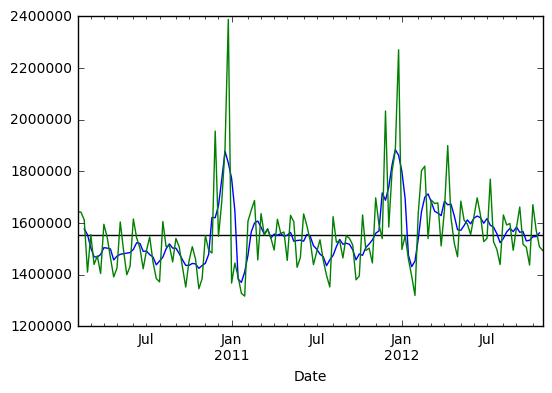

In [19]:
import matplotlib.pyplot as plt

store1_totals.rolling(4, center=True).mean().plot()
store1_totals.plot()
plt.hlines(store1_totals.mean(), store1_totals.index.min(), store1_totals.index.max())

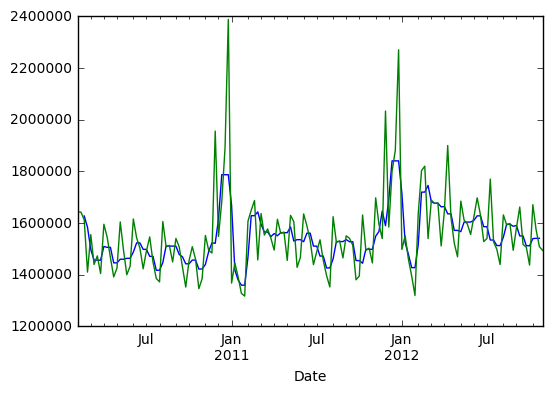

In [18]:
store1_totals.rolling(4, center=True).median().plot()
store1_totals.plot()

Compute the 1, 2, 52 autocorrelations for Weekly_Sales and/or create an autocorrelation plot.

In [21]:
store1_totals.autocorr(1)

0.30215827941131262

In [22]:
store1_totals.autocorr(2)

0.12741313055390097

In [23]:
store1_totals.autocorr(52)

0.89537602947770079

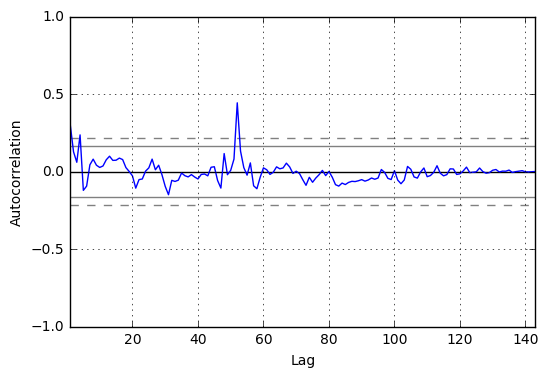

In [24]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(store1_totals)

Split the weekly sales data in a training and test set - using 75% of the data for training

In [25]:
print .75*len(store1_totals)

107.25


In [28]:
training = store1_totals.iloc[0:108]

In [29]:
test = store1_totals.iloc[108:]

Create an AR(1) model on the training data and compute the mean absolute error of the predictions. How effective is this model?

In [33]:
import math

def mean_absolute_error(prediction, actual):
    vals = []
    for i in range(len(actual)):
        vals.append(abs(prediction[i] - actual[i]))
    numerator = sum(vals)
    denominator = len(actual)
    return numerator / float(denominator)

In [34]:
mean_absolute_error([1, 1, 1], [0, 1, 0])

0.6666666666666666

In [60]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

In [37]:
model = ARMA(training,(1,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  108
Model:                     ARMA(1, 0)   Log Likelihood               -1447.727
Method:                       css-mle   S.D. of innovations         160409.075
Date:                Wed, 30 Nov 2016   AIC                           2901.454
Time:                        12:26:50   BIC                           2909.500
Sample:                    02-07-2010   HQIC                          2904.716
                         - 02-26-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   2.22e+04     69.636      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.3066      0.091      3.363      0.001         0.128     0.485
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2621           +0.0000j            3.2621            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
len(test)

35

In [45]:
predictions = model.predict(108, 108+34)

In [46]:
len(predictions)

35

In [47]:
predictions

2012-03-04    1.542397e+06
2012-03-11    1.543319e+06
2012-03-18    1.543602e+06
2012-03-25    1.543689e+06
2012-04-01    1.543715e+06
2012-04-08    1.543723e+06
2012-04-15    1.543726e+06
2012-04-22    1.543727e+06
2012-04-29    1.543727e+06
2012-05-06    1.543727e+06
2012-05-13    1.543727e+06
2012-05-20    1.543727e+06
2012-05-27    1.543727e+06
2012-06-03    1.543727e+06
2012-06-10    1.543727e+06
2012-06-17    1.543727e+06
2012-06-24    1.543727e+06
2012-07-01    1.543727e+06
2012-07-08    1.543727e+06
2012-07-15    1.543727e+06
2012-07-22    1.543727e+06
2012-07-29    1.543727e+06
2012-08-05    1.543727e+06
2012-08-12    1.543727e+06
2012-08-19    1.543727e+06
2012-08-26    1.543727e+06
2012-09-02    1.543727e+06
2012-09-09    1.543727e+06
2012-09-16    1.543727e+06
2012-09-23    1.543727e+06
2012-09-30    1.543727e+06
2012-10-07    1.543727e+06
2012-10-14    1.543727e+06
2012-10-21    1.543727e+06
2012-10-28    1.543727e+06
Freq: W-SUN, dtype: float64

In [48]:
mean_absolute_error(predictions.values, test.values)

82721.310387076519

Plot the residuals

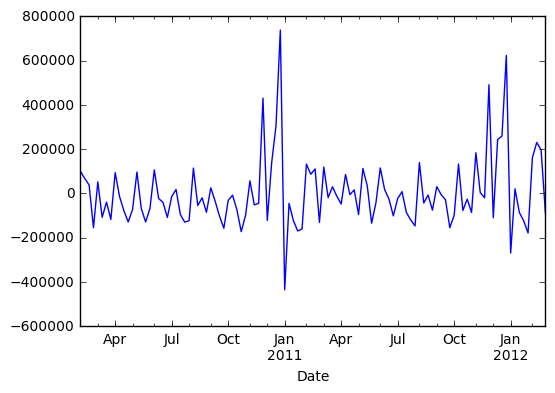

In [49]:
model.resid.plot()

Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set?

In [50]:
model = ARMA(training,(2,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  108
Model:                     ARMA(2, 0)   Log Likelihood               -1447.580
Method:                       css-mle   S.D. of innovations         160187.364
Date:                Wed, 30 Nov 2016   AIC                           2903.160
Time:                        12:37:17   BIC                           2913.889
Sample:                    02-07-2010   HQIC                          2907.510
                         - 02-26-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   2.33e+04     66.170      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.2903      0.096      3.031      0.003         0.103     0.478
ar.L2.Weekly_Sales     0.0525      0.097      0.542      0.589        -0.137     0.242
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4020           +0.0000j            2.4020            0.0000
AR.2           -7.9370           +0.0000j            7.9370            0.5000
-----------------------------------------------------------------------------
"""

In [51]:
predictions = model.predict(108, 108+34)

In [52]:
mean_absolute_error(predictions.values, test.values)

82145.133861284383

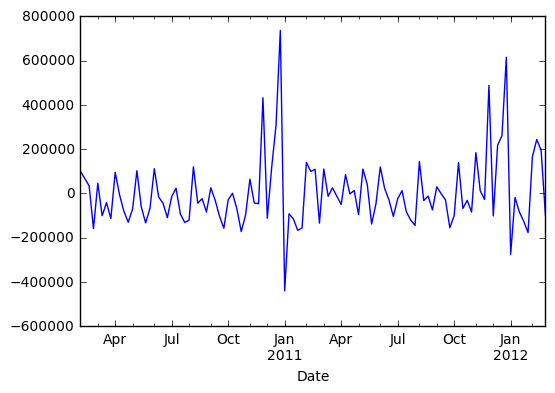

In [53]:
model.resid.plot()

In [54]:
model = ARMA(training,(2,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  108
Model:                     ARMA(2, 2)   Log Likelihood               -1438.590
Method:                       css-mle   S.D. of innovations         143458.073
Date:                Wed, 30 Nov 2016   AIC                           2889.180
Time:                        12:38:02   BIC                           2905.272
Sample:                    02-07-2010   HQIC                          2895.705
                         - 02-26-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06    1.9e+04     81.070      0.000      1.51e+06  1.58e+06
ar.L1.Weekly_Sales    -1.0397      0.089    -11.636      0.000        -1.215    -0.865
ar.L2.Weekly_Sales    -0.4700      0.087     -5.404      0.000        -0.641    -0.300
ma.L1.Weekly_Sales     1.4689      0.056     26.270      0.000         1.359     1.578
ma.L2.Weekly_Sales     0.9997      0.071     14.092      0.000         0.861     1.139
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1060           -0.9510j            1.4586           -0.3870
AR.2           -1.1060           +0.9510j            1.4586            0.3870
MA.1           -0.7347           -0.6787j            1.0002           -0.3813
MA.2           -0.7347           +0.6787j            1.0002            0.3813
-----------------------------------------------------------------------------
"""

In [55]:
predictions = model.predict(108, 108+34)

In [56]:
mean_absolute_error(predictions.values, test.values)

82167.085960509517

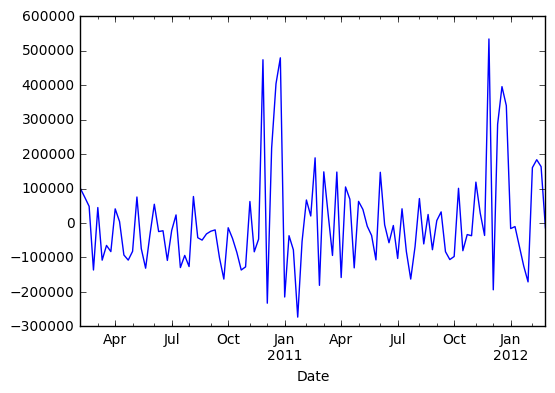

In [57]:
model.resid.plot()

Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [79]:
model = ARIMA(training, (12, 0, 2)).fit()
model.summary()

/home/nick/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  108
Model:                    ARMA(12, 2)   Log Likelihood               -1433.524
Method:                       css-mle   S.D. of innovations         137099.306
Date:                Wed, 30 Nov 2016   AIC                           2899.049
Time:                        12:44:17   BIC                           2941.963
Sample:                    02-07-2010   HQIC                          2916.449
                         - 02-26-2012                                         
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                1.544e+06   2.27e+04     68.068      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     -1.0335      0.101    -10.213      0.000        -1.232    -0.835
ar.L2.Weekly_Sales     -0.2945      0.138     -2.135      0.035        -0.565    -0.024
ar.L3.Weekly_Sales      0.2921      0.143      2.050      0.043         0.013     0.571
ar.L4.Weekly_Sales      0.2323      0.148      1.568      0.120        -0.058     0.523
ar.L5.Weekly_Sales     -0.0171      0.149     -0.114      0.909        -0.310     0.276
ar.L6.Weekly_Sales     -0.2874      0.148     -1.936      0.056        -0.578     0.004
ar.L7.Weekly_Sales     -0.1574      0.151     -1.039      0.301        -0.454     0.139
ar.L8.Weekly_Sales      0.1292      0.154      0.838      0.404        -0.173     0.431
ar.L9.Weekly_Sales      0.0975      0.148      0.659      0.511        -0.192     0.387
ar.L10.Weekly_Sales     0.0741      0.146      0.508      0.613        -0.212     0.360
ar.L11.Weekly_Sales    -0.0134      0.155     -0.087      0.931        -0.316     0.289
ar.L12.Weekly_Sales    -0.0519      0.124     -0.420      0.675        -0.294     0.190
ma.L1.Weekly_Sales      1.4976      0.045     33.144      0.000         1.409     1.586
ma.L2.Weekly_Sales      0.9963      0.042     23.913      0.000         0.915     1.078
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.8608           -0.6439j            1.0750           -0.3978
AR.2            -0.8608           +0.6439j            1.0750            0.3978
AR.3            -1.2918           -0.1940j            1.3063           -0.4763
AR.4            -1.2918           +0.1940j            1.3063            0.4763
AR.5            -0.4020           -1.1940j            1.2599           -0.3017
AR.6            -0.4020           +1.1940j            1.2599            0.3017
AR.7            -0.0390           -1.2964j            1.2970           -0.2548
AR.8            -0.0390           +1.2964j            1.2970            0.2548
AR.9             0.9782           -0.7994j            1.2633           -0.1090
AR.10            0.9782           +0.7994j            1.2633            0.1090
AR.11            1.4865           -0.2857j            1.5137           -0.0302
AR.12            1.4865           +0.2857j            1.5137            0.0302
MA.1            -0.7516           -0.6624j            1.0019           -0.3850
MA.2            -0.7516           +0.6624j            1.0019            0.3850
------------------------------------------------------------------------------
"""

In [80]:
predictions = model.predict(108, 108+34)

In [81]:
mean_absolute_error(predictions.values, test.values)

83342.095110839786

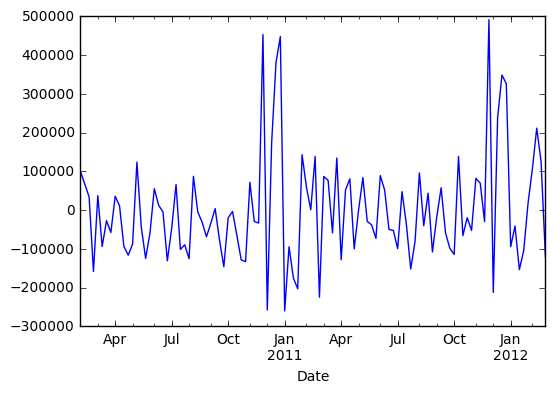

In [82]:
model.resid.plot()

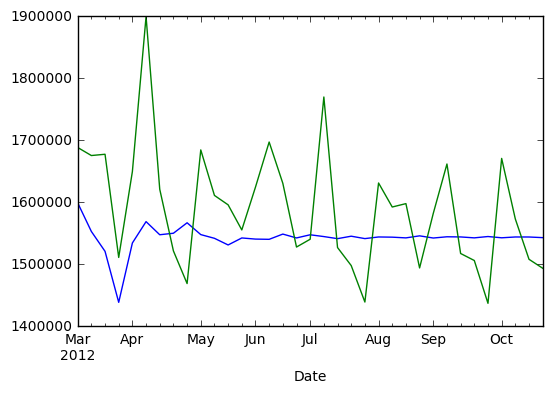

In [83]:
predictions.plot()
test.plot()